In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

### Naive Bayes for Continuous Data

In [56]:
df = pd.read_csv('backpain.csv')

In [57]:
df

,pelvic_incidence,pelvictilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvictilt                310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Status                    310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvictilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
pelvic_slope,310.0,0.472979,0.285787,0.003220,0.224367,0.475989,0.704846,0.998827
Direct_tilt,310.0,21.321526,8.639423,7.027000,13.054400,21.907150,28.954075,36.743900
thoracic_slope,310.0,13.064511,3.399713,7.037800,10.417800,12.938450,15.889525,19.324000
cervical_tilt,310.0,11.933317,2.893265,7.030600,9.541140,11.953835,14.371810,16.821080


In [60]:
df['Status'].value_counts()

Abnormal    210
Normal      100
Name: Status, dtype: int64

In [61]:
df.duplicated().sum()

0

In [62]:
ind_var = df.drop(columns=['Status']).columns
ind_var

Index(['pelvic_incidence', 'pelvictilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt',
       'sacrum_angle', 'scoliosis_slope'],
      dtype='object')

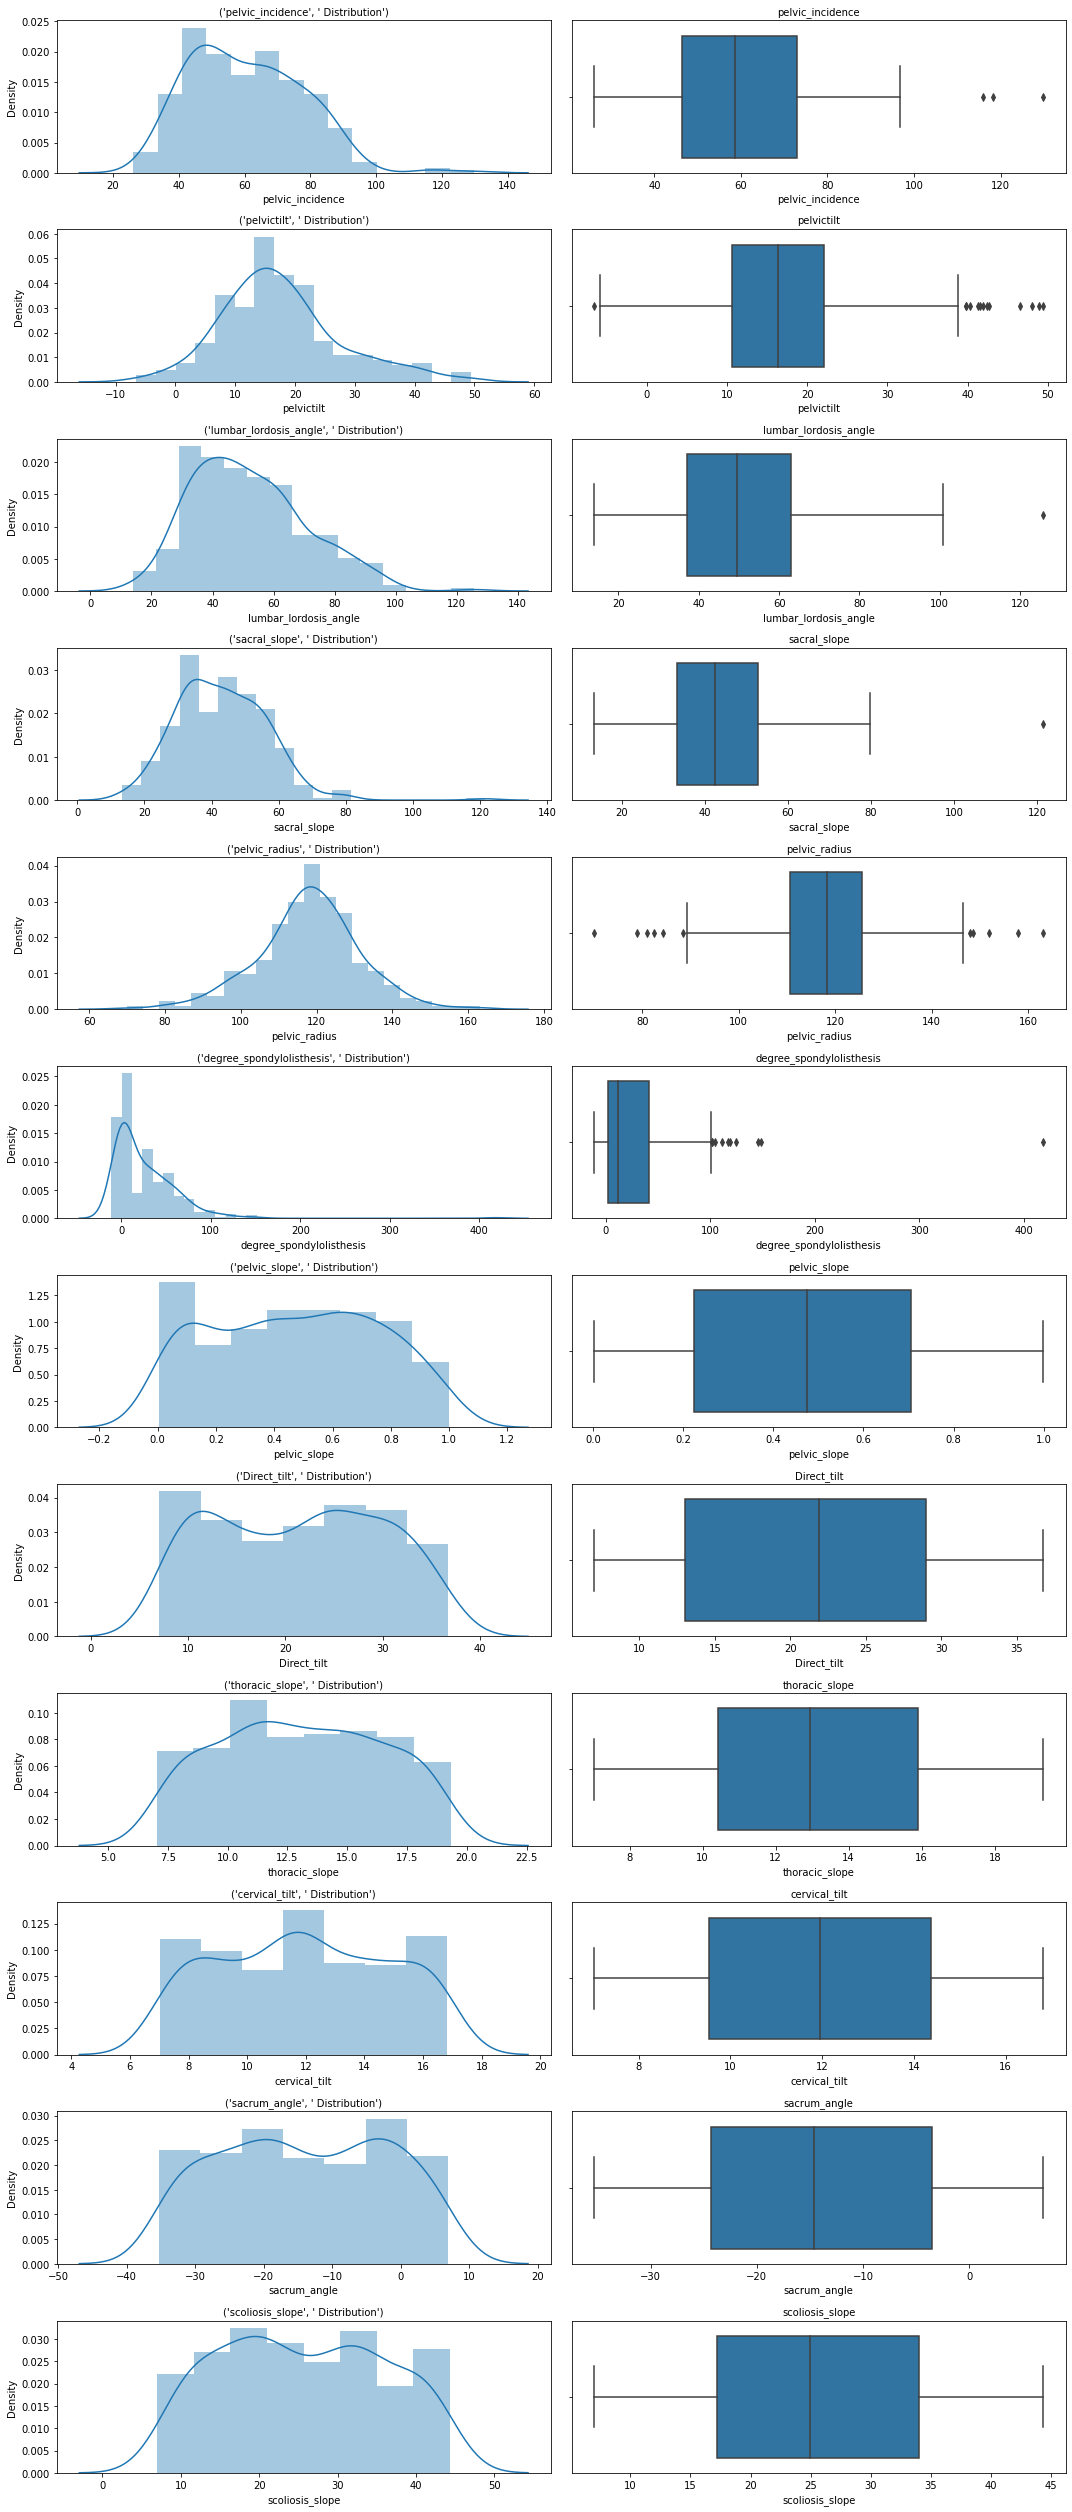

In [63]:
fig, axes = plt.subplots(nrows=len(ind_var),ncols=2)
fig.set_size_inches(15,35)
count = 0
for i in ind_var:
    a = sns.distplot(df[i] , ax=axes[count][0],kde=True)
    a.set_title((i," Distribution"),fontsize=10)

    a = sns.boxplot(df[i], orient = "v", ax=axes[count][1])
    a.set_title(i,fontsize=10)

    count+=1

plt.tight_layout()
plt.show()

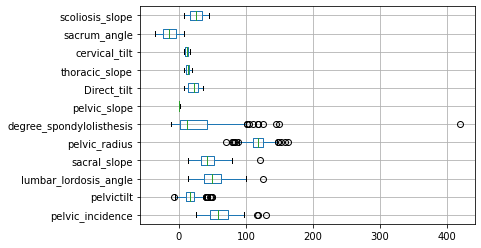

In [64]:
df.boxplot(vert=0)

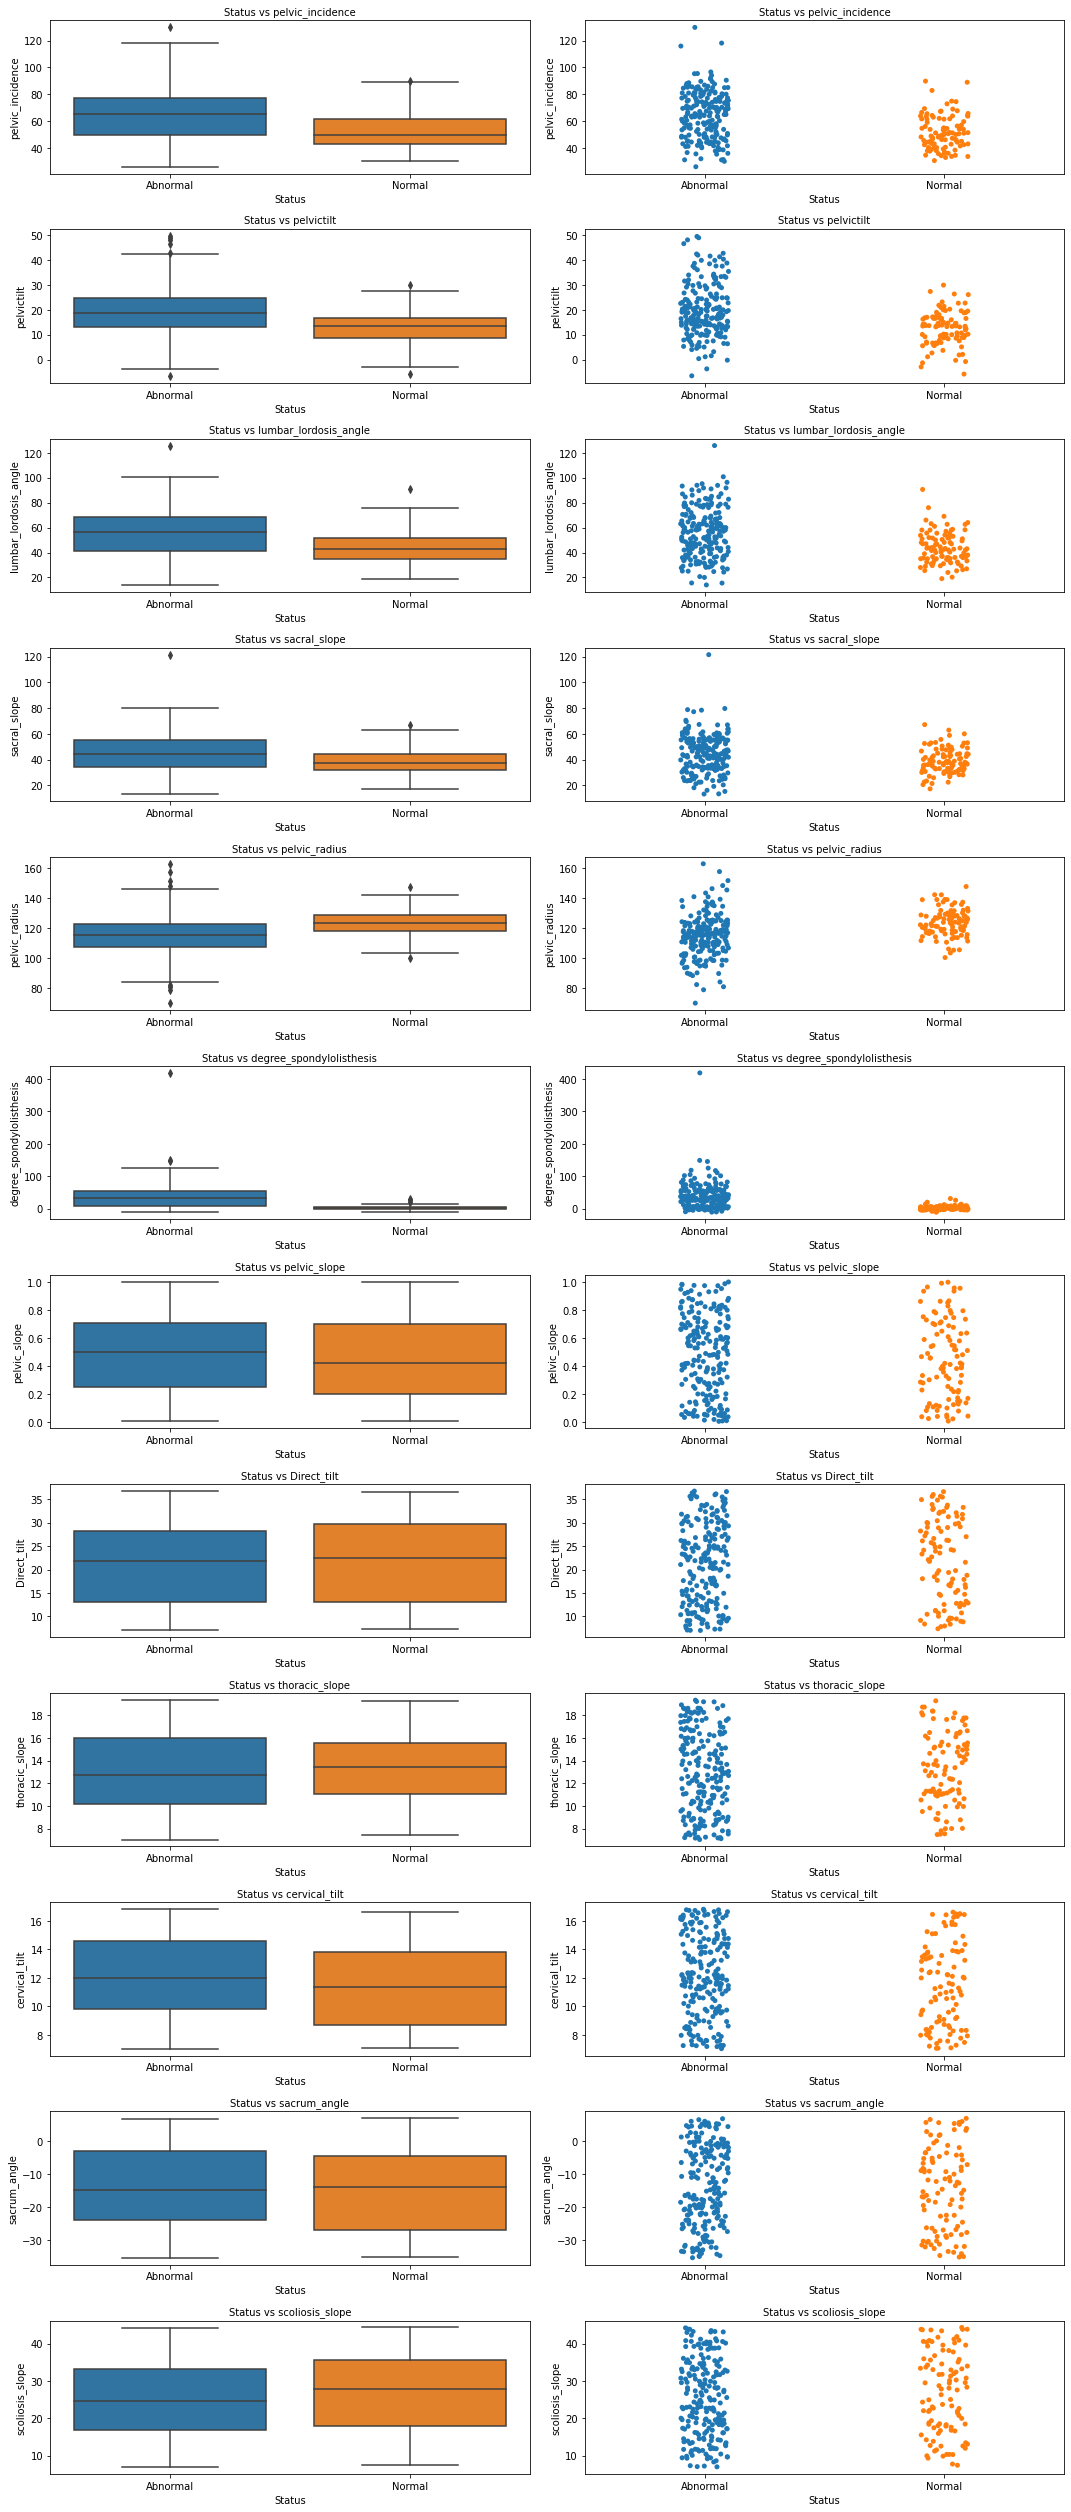

In [65]:
fig, axes = plt.subplots(nrows=len(ind_var),ncols=2)
fig.set_size_inches(15,35)
count = 0
for i in ind_var:
    a = sns.boxplot(df["Status"],df[i] , ax=axes[count][0])
    title = "Status vs " + i
    a.set_title(title,fontsize=10)

    a = sns.stripplot(df["Status"],df[i] , orient = "v" , ax=axes[count][1])
    a.set_title(title,fontsize=10)
    
    count+=1

plt.tight_layout()
plt.show()

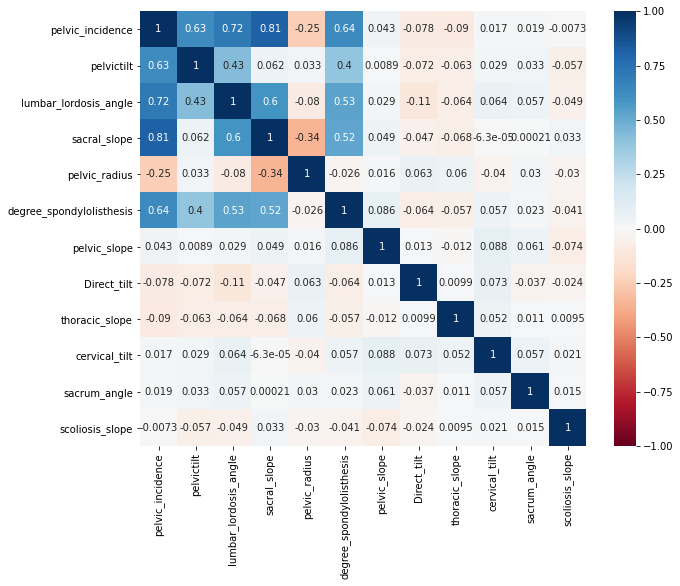

In [66]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), vmin = -1 , cmap = 'RdBu' , annot=True)

In [67]:
def outlier_cap(col):
    sorted(col)
    Q1, Q3 = np.percentile(col, [25,75])
    IQR = Q3 -Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 +(1.5*IQR)
    return lower_range,upper_range

In [68]:
df.iloc[:,:-1].columns

Index(['pelvic_incidence', 'pelvictilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt',
       'sacrum_angle', 'scoliosis_slope'],
      dtype='object')

In [69]:
for column in df.iloc[:,:-1].columns:
    lr,ur = outlier_cap(df[column])
    df[column] = np.where(df[column]>ur, ur,df[column])
    df[column] = np.where(df[column]<lr, lr,df[column])

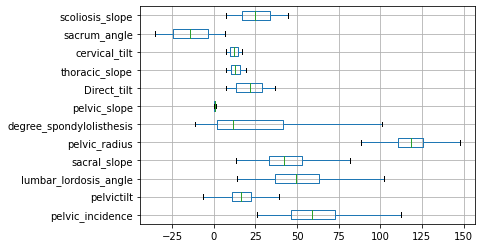

In [70]:
df.boxplot(vert=0)

In [71]:
df['Status'].replace({'Abnormal' : 1 , 'Normal' : 0}, inplace=True)

In [72]:
df['Status'].value_counts()

1    210
0    100
Name: Status, dtype: int64

In [73]:
X=df.drop("Status",axis=1)
Y=df["Status"]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state = 1) 

In [75]:
#  Naive Bayes

from sklearn import metrics

In [76]:
NB_model = GaussianNB()

In [77]:
NB_model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [78]:
def model_performance(x,y):
    #Performance of Model on Train Data
    y_predict = NB_model.predict(x)
    model_score = NB_model.score(x, y)
    print(model_score)
    print(metrics.confusion_matrix(y,y_predict))
    print(metrics.classification_report(y,y_predict))

In [79]:
model_performance(X_train, y_train)

0.7741935483870968
[[ 64   9]
 [ 40 104]]
              precision    recall  f1-score   support

           0       0.62      0.88      0.72        73
           1       0.92      0.72      0.81       144

    accuracy                           0.77       217
   macro avg       0.77      0.80      0.77       217
weighted avg       0.82      0.77      0.78       217



In [80]:
model_performance(X_test, y_test)

0.8172043010752689
[[24  3]
 [14 52]]
              precision    recall  f1-score   support

           0       0.63      0.89      0.74        27
           1       0.95      0.79      0.86        66

    accuracy                           0.82        93
   macro avg       0.79      0.84      0.80        93
weighted avg       0.85      0.82      0.82        93



### Text Based Naive Bayes

In [81]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer

In [82]:
sms = pd.read_csv('sms.csv', header=0, names= ['label', 'message'])

sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [83]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5574 non-null   object
 1   message  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [84]:
sms.label.value_counts()

ham     4827
spam     747
Name: label, dtype: int64

In [85]:
sms.label.value_counts(1)

ham     0.865985
spam    0.134015
Name: label, dtype: float64

In [86]:
sms['label_num'] = sms.label.map({'ham' : 0 , 'spam' : 1})

In [87]:
X = sms.message
y= sms.label_num

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [89]:
vect = CountVectorizer()

In [90]:
# learn training data vocabulary, then use it to create a document-term matrix
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)

In [91]:
# examine the document-term matrix
X_train_dtm

<4180x7449 sparse matrix of type '<class 'numpy.int64'>'
	with 55872 stored elements in Compressed Sparse Row format>

In [92]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1394x7449 sparse matrix of type '<class 'numpy.int64'>'
	with 16922 stored elements in Compressed Sparse Row format>

In [93]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [94]:
# train the model using X_train_dtm
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [95]:
# Performance on Train Data
y_pred_train = nb.predict(X_train_dtm)
model_score = metrics.accuracy_score(y_train,y_pred_train)

print(model_score)
print(metrics.confusion_matrix(y_train,y_pred_train))
print(metrics.classification_report(y_train,y_pred_train))

0.9944976076555024
[[3622    7]
 [  16  535]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3629
           1       0.99      0.97      0.98       551

    accuracy                           0.99      4180
   macro avg       0.99      0.98      0.99      4180
weighted avg       0.99      0.99      0.99      4180



In [96]:
# Performance on Test Data
y_pred_test = nb.predict(X_test_dtm)
model_score = metrics.accuracy_score(y_test,y_pred_test)

print(model_score)
print(metrics.confusion_matrix(y_test,y_pred_test))
print(metrics.classification_report(y_test,y_pred_test))

0.9806312769010043
[[1192    6]
 [  21  175]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1198
           1       0.97      0.89      0.93       196

    accuracy                           0.98      1394
   macro avg       0.97      0.94      0.96      1394
weighted avg       0.98      0.98      0.98      1394



In [97]:
# print message text for the false positives (ham incorrectly classified as spam)
X_test[y_test < y_pred_test]

1290    Hey...Great deal...Farm tour 9am to 5pm $95/pa...
1082                    Can u get pic msgs to your phone?
1260    We have sent JD for Customer Service cum Accou...
421      Yes:)from last week itself i'm taking live call.
4382               Mathews or tait or edwards or anderson
4557                              Gettin rdy to ship comp
Name: message, dtype: object

In [98]:
# print message text for the false negatives (spam incorrectly classified as ham)
X_test[y_test > y_pred_test]

2269                    88066 FROM 88066 LOST 3POUND HELP
4821    Check Out Choose Your Babe Videos @ sms.shsex....
2352    Download as many ringtones as u like no restri...
4949    Hi this is Amy, we will be sending you a free ...
1430    For sale - arsenal dartboard. Good condition b...
4676    Hi babe its Chloe, how r u? I was smashed on s...
955             Filthy stories and GIRLS waiting for your
1469    Hi its LUCY Hubby at meetins all day Fri & I w...
3991    (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3864    Oh my god! I've found your number again! I'm s...
3501    Dorothy@kiefer.com (Bank of Granite issues Str...
1638    0A$NETWORKS allow companies to bill for SMS, s...
2558    This message is brought to you by GMW Ltd. and...
68      Did you hear about the new "Divorce Barbie"? I...
2247    Hi ya babe x u 4goten bout me?' scammers getti...
684     Hi I'm sue. I am 20 years old and work as a la...
2774    How come it takes so little time for a child w...
2699          